In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [11]:
# Target User Account
target_user = ("@BBCNews", "@CNN", "@CBS","@FOXNEWS","@nytimes")

df = pd.DataFrame ({'Media':["BBC","CNN","CBS","FOX","NYT"],
                'Polatity':[0,0,0,0,0]})

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
    
#     Polarity = {"Airline": target,
#                  "compound": np.mean(compound_list),
#                  "Positive": np.mean(positive_list),
#                  "Negative": np.mean(negative_list),
#                  "Neutral": np.mean(neutral_list)
                
                
                
#                 }

    # Print the Averages
    print("")
    print("User: %s" % user)
    print("Compound: %s" % np.mean(compound_list))
    print("Positive: %s" % np.mean(positive_list))
    print("Neutral: %s" % np.mean(neutral_list))
    print("Negative: %s" % np.mean(negative_list))
    df.head(5)


User: @BBCNews
Compound: -0.071525
Positive: 0.07165
Neutral: 0.8099999999999998
Negative: 0.11835

User: @CNN
Compound: -0.11983
Positive: 0.04215
Neutral: 0.8541999999999998
Negative: 0.10375000000000002

User: @CBS
Compound: 0.246585
Positive: 0.14375
Neutral: 0.8117999999999997
Negative: 0.04455

User: @FOXNEWS
Compound: -0.08391499999999999
Positive: 0.0613
Neutral: 0.8492500000000001
Negative: 0.08945

User: @nytimes
Compound: -0.05966499999999998
Positive: 0.08134999999999999
Neutral: 0.8236000000000001
Negative: 0.09505


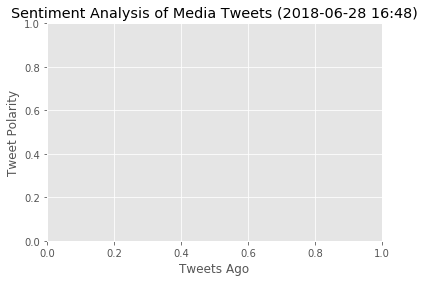

In [4]:
# Create plot
# YOUR CODE HERE

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.x = compound_list
plt.y = 
plt.show()